# Further Exploratory Data Analysis

### Data Preparation




In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#set up a custom qualitative color palette
xkcd_colors = ['purple','green','blue','pink','brown','red','light blue',\
              'tan','light green','magenta','yellow','sky blue','teal','orange','light purple']
catpal = sns.xkcd_palette(xkcd_colors)



#Import Main Data Frame
cleanpath='Data/NM_2016_17clean.csv'
df = pd.read_csv(cleanpath)

#print(df.shape[0],'x',df.shape[1])
#df.columns

In [2]:
# convert 'INCIDENT DATE' column to date time objects (and limit to 2017)
df['INCIDENT DATE'] = pd.to_datetime(df['INCIDENT DATE'])
df.index  = df['INCIDENT DATE']
df = df['2017']
print(df.shape)
df['Total Killed'].sum()

(3541, 68)


442.0

In [3]:
#Combine disticts data frame with province and population data
pop_pd = pd.read_csv('Data/District_Province_Population')
pop_pd = pop_pd.set_index('District')
pop_pd = pop_pd.sort_index()
#pop_pd.head()

In [4]:
#import old population by ward datada
popfile = 'Data/nepal_population_household_ward-2011.csv'
shpfile = 'Data/npl_polbanda_adm5_wad_25k_50k_sdn_wgs84.csv'
pop_oldward = pd.read_csv(popfile)
dens = pd.read_csv(shpfile)
#pop_oldward.head()
dens.index = dens['HLCIT_CODE']
pop_oldward = pop_oldward.join(dens[['AREA','Shape_Area']], how='left', on='HLCIT_CODE_WARD')
pop_oldward.head()
#dens.head()

,DISTRICT,V.D.C./MUNICIPALITY,dv_join,WARD NUMBER,HOUSEHOLD,POPULATION,CBS CODE,P_CODE_DIST,HLCIT_CODE_DIST,P_CODE_VDC,HLCIT_CODE_VDC,P_CODE_WARD,HLCIT_CODE_WARD,elevation_above_1500m,AREA,Shape_Area
0,Achham,Babala,AchhamBabala,1,19,90,690001,F-SET-69,524 5 13 69,F-SET-69-001,524 5 13 69 5 008,F-SET-69-001-01,524 5 13 69 5 008 1,0,726411.298,0.000067
1,Achham,Babala,AchhamBabala,2,90,457,690001,F-SET-69,524 5 13 69,F-SET-69-001,524 5 13 69 5 008,F-SET-69-001-02,524 5 13 69 5 008 2,0,1130134.914,0.000105
2,Achham,Babala,AchhamBabala,3,111,596,690001,F-SET-69,524 5 13 69,F-SET-69-001,524 5 13 69 5 008,F-SET-69-001-03,524 5 13 69 5 008 3,0,4081169.503,0.000378
3,Achham,Babala,AchhamBabala,4,87,471,690001,F-SET-69,524 5 13 69,F-SET-69-001,524 5 13 69 5 008,F-SET-69-001-04,524 5 13 69 5 008 4,0,4065819.645,0.000377
4,Achham,Babala,AchhamBabala,5,31,161,690001,F-SET-69,524 5 13 69,F-SET-69-001,524 5 13 69 5 008,F-SET-69-001-05,524 5 13 69 5 008 5,0,1297205.597,0.000120


In [5]:
#agrigate population by old VDCS
oldVDC = pop_oldward.groupby(['HLCIT_CODE_VDC','V.D.C./MUNICIPALITY','DISTRICT']).sum()
#print(pop_oldVDC.shape())
pop_oldVDC = oldVDC[['POPULATION','HOUSEHOLD','AREA','elevation_above_1500m']].reset_index(level=[1,2])
pop_oldVDC['DENSITY'] = pop_oldVDC['POPULATION']/pop_oldVDC['AREA']
pop_oldVDC.head()
#oldVDC

,V.D.C./MUNICIPALITY,DISTRICT,POPULATION,HOUSEHOLD,AREA,elevation_above_1500m,DENSITY
HLCIT_CODE_VDC,,,,,,,
524 1 01 01 5 001,Phungling,Taplejung,14974,3571,2.416742e+07,0,0.000620
524 1 01 01 5 002,Hangdewa,Taplejung,3605,753,2.365687e+07,0,0.000152
524 1 01 01 5 003,Phurumbu,Taplejung,2413,493,2.842810e+07,0,0.000085
524 1 01 01 5 004,Linkhim,Taplejung,2214,457,2.632693e+07,0,0.000084
524 1 01 01 5 005,Dokhu,Taplejung,4111,909,1.793193e+07,0,0.000229


In [6]:
#create source dummies! 
s=df['SOURCE TYPE'].str.split('" "')
source_dum = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='')#.sum(level=0, axis=0)
source_dum.columns = source_dum.columns.str.strip()
source_dum = source_dum.groupby(source_dum.columns, axis=1).sum()
source_dum = source_dum.loc[:,:'Police website']
source_dum['HLCIT_CODE_VDC'] = df['HLCIT CODE'].str[:17]
source_dum_VDC = source_dum.groupby('HLCIT_CODE_VDC').sum()

In [7]:
print(source_dum.shape)
source_dum_VDC.head()

(3541, 35)


,Apan Dainik,Direct Report,INSEC,Local Newspaper: Achham,Local Newspaper: Banke,Local Newspaper: Bardiya,Local Newspaper: Chitwan,Local Newspaper: Dadheldhura,Local Newspaper: Dang,Local Newspaper: Dhading,...,Local Newspaper: Rupandehi,Local Newspaper: Saptari,Local Newspaper: Sarlahi,Local Newspaper: Sindhuli,Local Newspaper: Sindhupalchok,Local Newspaper: Siraha,Local Newspaper: Surkhet,National/Online Media,Other sources,Police website
HLCIT_CODE_VDC,,,,,,,,,,,,,,,,,,,,,
524 1 01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524 1 01 01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524 1 01 01 5 001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
524 1 01 01 5 003,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
524 1 01 01 5 018,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#Create df of incidents by VDC
codes = df['HLCIT CODE'] 
shortcodes = codes.str[:17]#apply(lambda x: x[:17])
#create dummy columns (onehot encode)
#incidents_VDC = df.join(source_dum, on='INCIDENT NUMBER', lsuffix='_l')
incidents_VDC = pd.get_dummies(df, columns=['Violent vs non-violent', 'One-sided vs two-sided', 'Number of Deaths',
       'Collective vs interpersonal', 'Forms and Causes',
       'Event form - primary', 'Event form - secondary', 'Weapon', 'Weapon 2',
       'Cause - primary', 'Cause - secondary', 'Crosscutting issues',
       'Actor 1 - Perpetrator Type',
       'Actor 1 - Youth -25 years or below- involvement',
       'Target - if one-sided violence',
       'Perpetrator 2 - if two-sided violence',
       'Actor 2 - Youth -25 years or below- involvement', 'Impacts','Election-related specific cause secondary'])#.join(source_dum, on='INCIDENT NUMBER', rsuffix='_r')

incidents_VDC['HLCIT_CODE_VDC'] = shortcodes
incidents_VDC = incidents_VDC.groupby(['HLCIT_CODE_VDC']).sum()
incidents_VDC = incidents_VDC.dropna(axis=1, how='all')
incidents_VDC = incidents_VDC.drop(['Ward','Ward(New)','INCIDENT NUMBER','LATITUDE','LONGITUDE','VERIFIED'],axis=1)
#incidents_VDC.index.label = 'VDC CODE'

#Join the incidents to population by VDC

#pop_incidents_VDC = pop_oldVDC.to_frame()
pop_incidents_VDC = pop_oldVDC.join(incidents_VDC).join(source_dum_VDC)

#pop_deaths_VDC['Deaths'] = Deaths
#pop_deaths_VDC = pop_deaths_VDC[0:-1]

#pop_deaths_VDC.shape
pop_incidents_VDC.head()

,V.D.C./MUNICIPALITY,DISTRICT,POPULATION,HOUSEHOLD,AREA,elevation_above_1500m,DENSITY,Number of Injuries,Total Killed,Female Killed,...,Local Newspaper: Rupandehi,Local Newspaper: Saptari,Local Newspaper: Sarlahi,Local Newspaper: Sindhuli,Local Newspaper: Sindhupalchok,Local Newspaper: Siraha,Local Newspaper: Surkhet,National/Online Media,Other sources,Police website
HLCIT_CODE_VDC,,,,,,,,,,,,,,,,,,,,,
524 1 01 01 5 001,Phungling,Taplejung,14974,3571,2.416742e+07,0,0.000620,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
524 1 01 01 5 002,Hangdewa,Taplejung,3605,753,2.365687e+07,0,0.000152,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524 1 01 01 5 003,Phurumbu,Taplejung,2413,493,2.842810e+07,0,0.000085,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
524 1 01 01 5 004,Linkhim,Taplejung,2214,457,2.632693e+07,0,0.000084,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524 1 01 01 5 005,Dokhu,Taplejung,4111,909,1.793193e+07,0,0.000229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Agrigate incidents and population by VDC
#(pop_incidents_VDC['Total Killed'].sum()/pop_incidents_VDC.POPULATION.sum())*100000
#min_sum = [x for x in pop_incidents_VDC.columns if pop_incidents_VDC[x].sum() > 40]
#print(min_sum)
#pop_incidents_VDC = pop_incidents_VDC[min_sum]

#abreviate dummy variable names so they are readable later
abrcol = pop_incidents_VDC.columns.tolist()
pop_incidents_VDC.columns = [ x[0:15] + ' ... ' + x[-35:] if len(x) > 50 else x for x in abrcol]

pop_incidents_VDC.head()

,V.D.C./MUNICIPALITY,DISTRICT,POPULATION,HOUSEHOLD,AREA,elevation_above_1500m,DENSITY,Number of Injuries,Total Killed,Female Killed,...,Local Newspaper: Rupandehi,Local Newspaper: Saptari,Local Newspaper: Sarlahi,Local Newspaper: Sindhuli,Local Newspaper: Sindhupalchok,Local Newspaper: Siraha,Local Newspaper: Surkhet,National/Online Media,Other sources,Police website
HLCIT_CODE_VDC,,,,,,,,,,,,,,,,,,,,,
524 1 01 01 5 001,Phungling,Taplejung,14974,3571,2.416742e+07,0,0.000620,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
524 1 01 01 5 002,Hangdewa,Taplejung,3605,753,2.365687e+07,0,0.000152,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524 1 01 01 5 003,Phurumbu,Taplejung,2413,493,2.842810e+07,0,0.000085,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
524 1 01 01 5 004,Linkhim,Taplejung,2214,457,2.632693e+07,0,0.000084,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524 1 01 01 5 005,Dokhu,Taplejung,4111,909,1.793193e+07,0,0.000229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
filt = [x.find('()') != -1 for x in pop_incidents_VDC.columns]
drp = pop_incidents_VDC.columns[filt]
pop_incidents_VDC.drop(drp, axis='columns', inplace=True)
print(drp)

Index(['Event form - secondary_ ()', 'Weapon_ ()', 'Weapon 2_ ()',
       'Cause - secondary_ ()', 'Target - if one-sided violence_ ()',
       'Perpetrator 2 - if two-sided violence_ ()'],
      dtype='object')


In [11]:
# Calculate overall homicide rate - Sanity Check - Should be 1.63
tkilled = pop_incidents_VDC['Total Killed'].sum()
tpop = pop_incidents_VDC['POPULATION'].sum()
hrate = round(tkilled/tpop*100000,2)
print(' Total Killed:', int(tkilled),'\n'\
      ,'Population:',int(tpop),'\n'\
      , 'Homicide Rate Per 100,000:', hrate)

 Total Killed: 431 
 Population: 26373129 
 Homicide Rate Per 100,000: 1.63


## Functions:
As I progressed some of the functions for creating graphs began to take up some space. I moved them here to avoid breaking up the narrative.

<a href='#top'>Back to top</a>
<a id='Question-2'></a>
## Investigation:


Simply dividing the sum of the Total Killed by the sum of the population per district (divided by 100,000) yields a homicide rate of about 1.68 per 100,000 people. This can be used as a sanity check for subsequent figures.


In [12]:
#heatmap function
import seaborn as sns 
def plotheat(df,title,label=False):
   
    corr = df.corr()
    #highcorr =  [corr[x].nlargest(2)[1] > .9 for x in corr.index]
    #highcorr = [corr[x].std() > .2 for x in corr.index]
    #print(highcorr)
    #corr = corr[highcorr]
    #corr = corr[:][corr.index]
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(22,16))
    
    #set title
    ax.set_title(title, fontsize='x-large')
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, as_cmap=True)

    #create a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    
    
    #create heatmap
    hm = sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidth=0)
    #print(corr.head())
    
    plt.xticks(fontsize='medium')
    plt.yticks(fontsize='medium')
    #label with pearson values
    def labelp(corr):
        for row in range(0,corr.shape[0]):
            for column in range(0,corr.shape[1]):
                pvalue = round(corr.iloc[column][row],2)
                if mask[column][row]==True and row!=column:
                    hm.text(column+0.5, row+0.6, pvalue, horizontalalignment='center', verticalalignment='center', size='small', color='purple')
    
    if label==True:
        labelp(corr)
    #plt.show()
    

In [13]:
print(pop_incidents_VDC.shape)
pop_incidents_VDC.head()

(3973, 375)


,V.D.C./MUNICIPALITY,DISTRICT,POPULATION,HOUSEHOLD,AREA,elevation_above_1500m,DENSITY,Number of Injuries,Total Killed,Female Killed,...,Local Newspaper: Rupandehi,Local Newspaper: Saptari,Local Newspaper: Sarlahi,Local Newspaper: Sindhuli,Local Newspaper: Sindhupalchok,Local Newspaper: Siraha,Local Newspaper: Surkhet,National/Online Media,Other sources,Police website
HLCIT_CODE_VDC,,,,,,,,,,,,,,,,,,,,,
524 1 01 01 5 001,Phungling,Taplejung,14974,3571,2.416742e+07,0,0.000620,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
524 1 01 01 5 002,Hangdewa,Taplejung,3605,753,2.365687e+07,0,0.000152,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524 1 01 01 5 003,Phurumbu,Taplejung,2413,493,2.842810e+07,0,0.000085,NaN,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
524 1 01 01 5 004,Linkhim,Taplejung,2214,457,2.632693e+07,0,0.000084,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524 1 01 01 5 005,Dokhu,Taplejung,4111,909,1.793193e+07,0,0.000229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


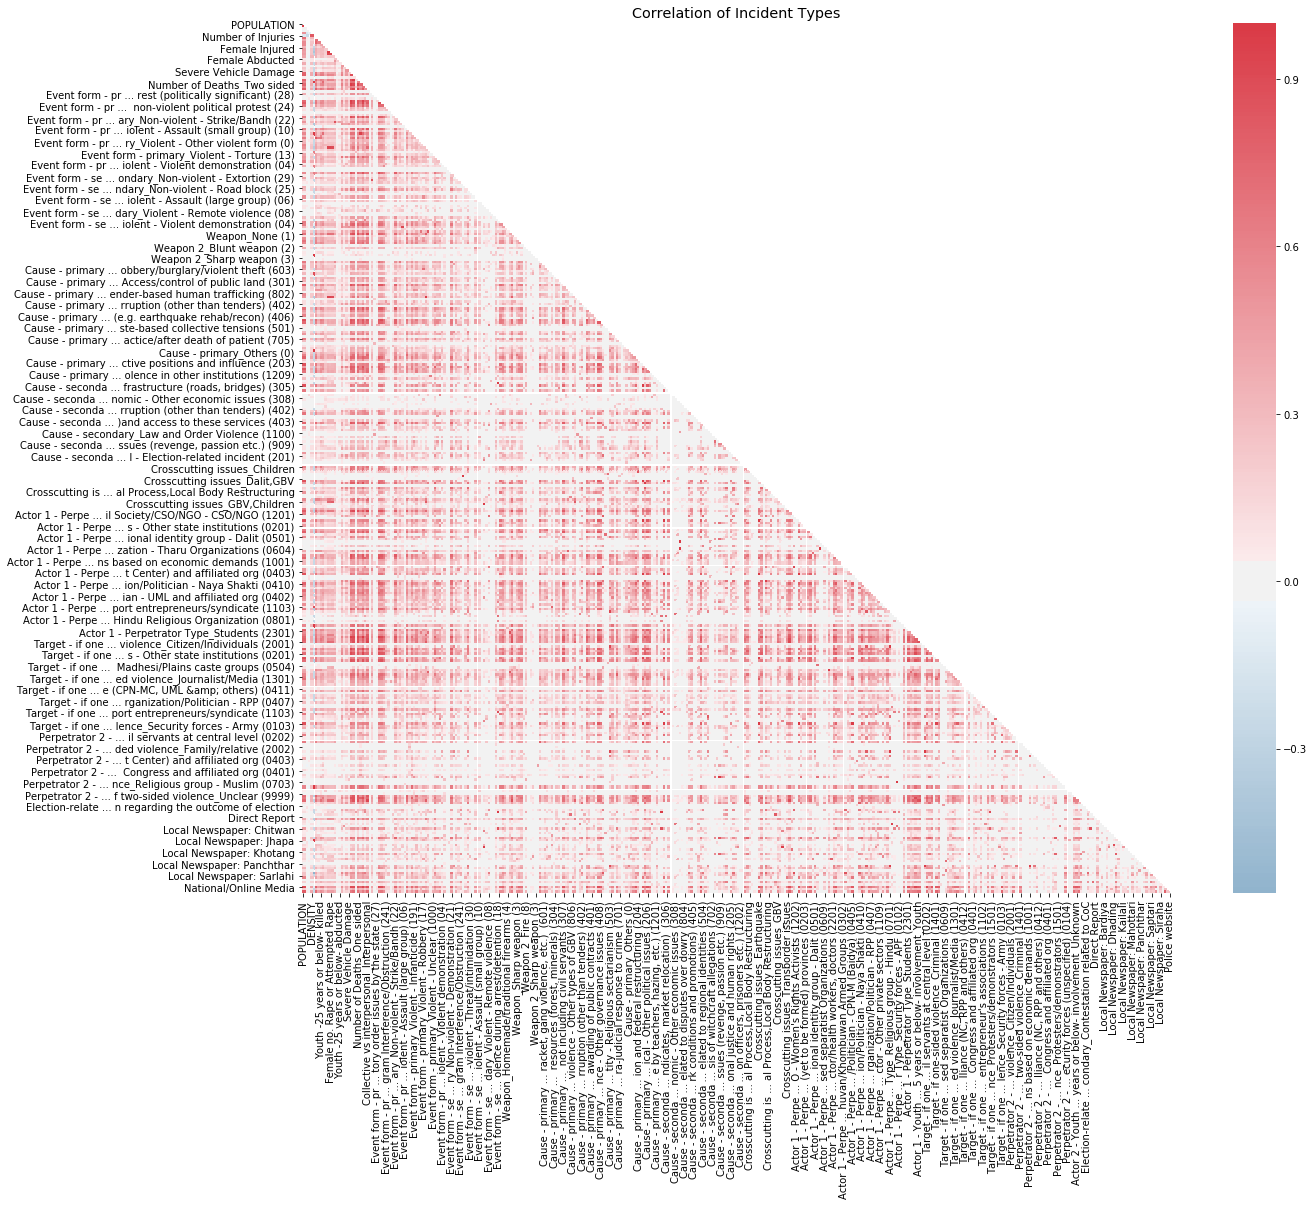

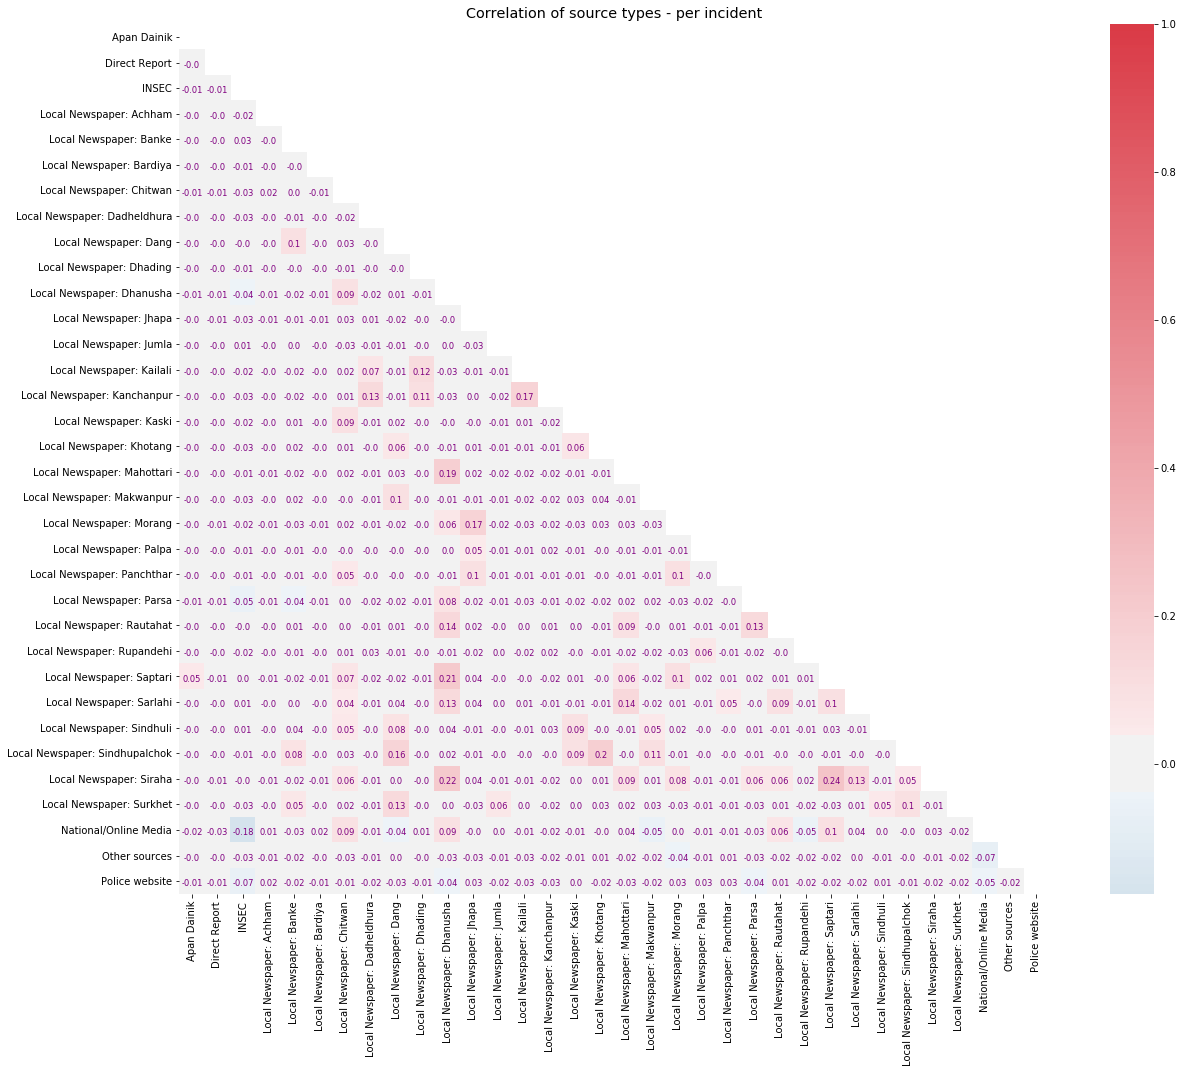

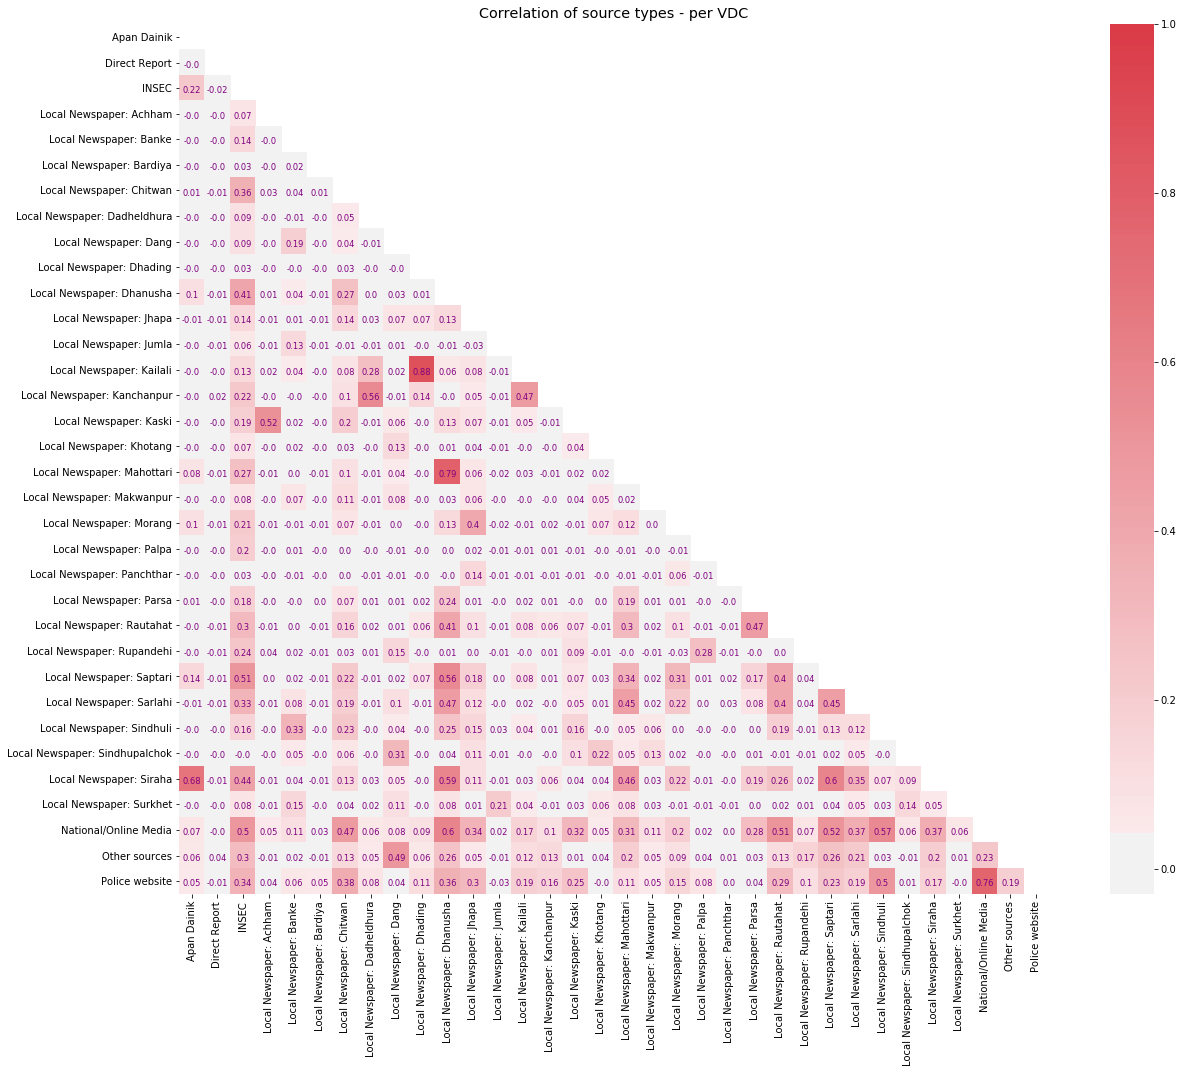

In [14]:
#plot heat maps
#imdist_pop_no_prov = imdist_pop.drop('Province', axis=1)
#pop_incidents_VDC.sort_values(by=['POPULATION'], ascending=True, axis='index', inplace=True)
plotheat(pop_incidents_VDC ,'Correlation of Incident Types', label = False)
#plotheat(norm_incidents_VDC, 'Correlation of Impacts - Per 100,000 Population')
plotheat(source_dum, 'Correlation of source types - per incident', label=True)
plotheat(source_dum_VDC, 'Correlation of source types - per VDC', label=True)
plt.show()

#### Hotspots
    Kailali, Dhading: .88
    Mahottari, Dhanusha: .79
    National, Police website: .76
    Siraha, Arpan Dainik: .68
    
#### Trends:
Wide correlation location-wise between insec and other sources/low correlation incident-wise. INSEC coverage is widespread but has little overlap with individual incidents.
        
Very little overlap in coverage on a per incident basis generally.

Dhanusha coverage correlating the most with other sources both by location and incident, particularly with national media and from sources in neighboring terrai districts


In [15]:
#Produce sorted list of higest 

In [16]:
#Produce sorted list of highest variable correlations 
corr = pop_incidents_VDC.corr(min_periods=130)
topcorr = corr.unstack()
topcorr = topcorr.sort_values(kind='quicksort',ascending=False)
#topcorr = topcorr[topcorr < 1]
#topcorr.drop(topcorr.index[10:-10],inplace=True)


No. Paired variables: 132076
No. r > .9: 134


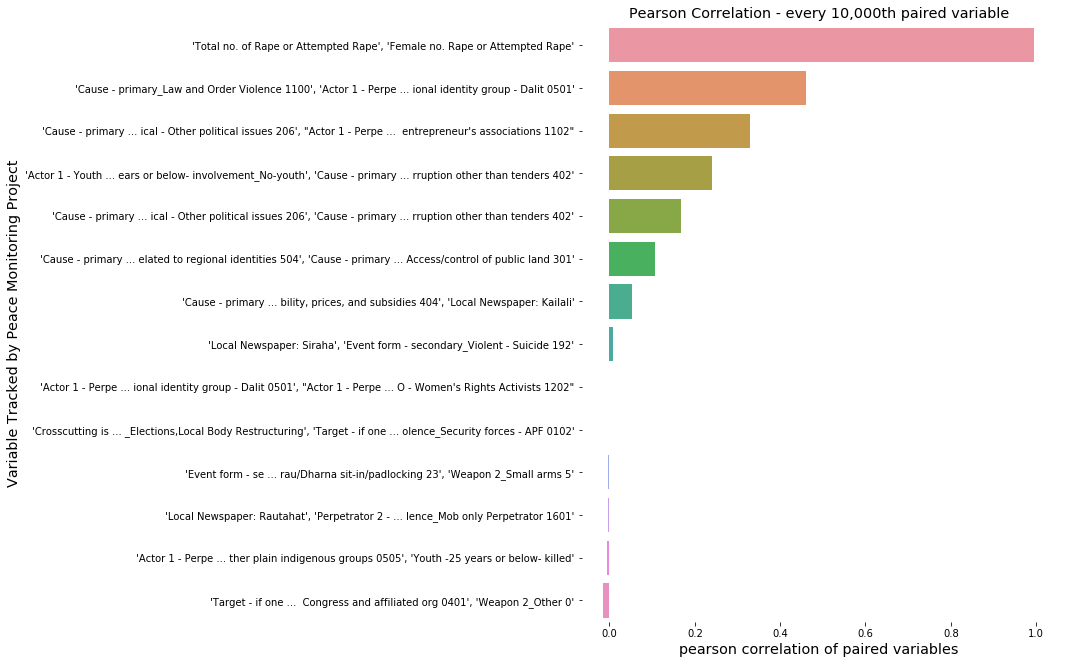

In [31]:
#plot highest correlations in bar chart
corrlist = topcorr[topcorr < 1]
print('No. Paired variables:',len(corrlist))
print('No. r > .9:', len(corrlist[corrlist > .9]))
corrlist = corrlist[:][::10000]
#corrlist = corrlist[:10]
#print(2)
#print(corrlist.index)
corrlist.index = [str(x).replace('(','').replace(')','') for x in corrlist.index.tolist()]
f, ax = plt.subplots(1,1)
sns.barplot(y=corrlist.index, x=corrlist)
sns.despine(left=True,bottom=True)
f.set_size_inches(8.5,11)
ax.set_title('Pearson Correlation - every 10,000th paired variable', fontsize='x-large')
ax.set_xlabel('pearson correlation of paired variables', fontsize='x-large')
ax.set_ylabel('Variable Tracked by Peace Monitoring Project', fontsize='x-large')
plt.show()

Plotting every 10,000th paired less than a perfect 1 to 1 pearson correlation (which would occur when variables are paired against themselves) shows that out of the 132,076 pairs with such a relationship, Roughly 50% of those have a some positive correlation, with the other half having either no correlation or a very slight negative correlation. Slightly more than 1% represented a pearson correlation, although this still represents 134 pairs.

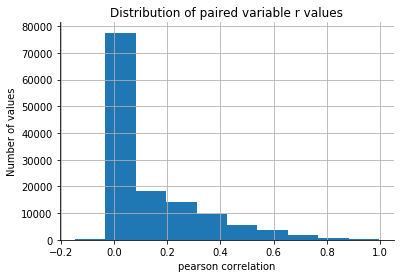

In [18]:
topcorr[topcorr < 1].hist()
plt.xlabel('pearson correlation')
plt.ylabel('Number of values')
plt.title('Distribution of paired variable r values')
sns.despine()
plt.show()

In [19]:
#sort correlation with one variable
def longcorr(df,var,hl):
    corr = df.corr(min_periods=130)
#narrow correlation matrix down to just population
    varcorr = corr[var]
#take 'population' out because it will correlate with self 1:1
    varcorr.drop(var, inplace=True)
#sort values
    varcorr = varcorr.sort_values(ascending=False)
    varcorr = varcorr.dropna()
    
    varcorr.drop(varcorr.index[10:-10], inplace=True)
    
    clrs = ['red' if (x in hl) else 'grey' for x in varcorr.index]
#plot all the correlations with call numbers
    f, ax = plt.subplots(1,1)
    sns.barplot(y=varcorr.index, x=varcorr, palette=clrs)
    f.set_size_inches(8.5,5.5)
    ax.set_xlabel('pearson correlation', fontsize='x-large')
    ax.set_ylabel('Variable Tracked by Peace Monitoring Project', fontsize='x-large')
    ax.set_title('Top and bottom 10 correlation with '+var)
    sns.despine(left=True,bottom=True)
    #plt.show()
    return varcorr

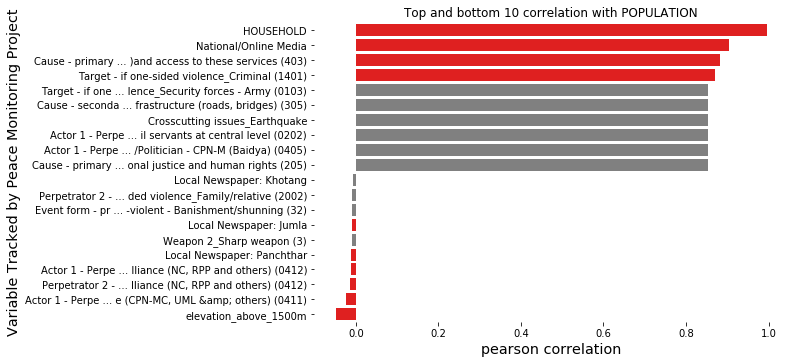

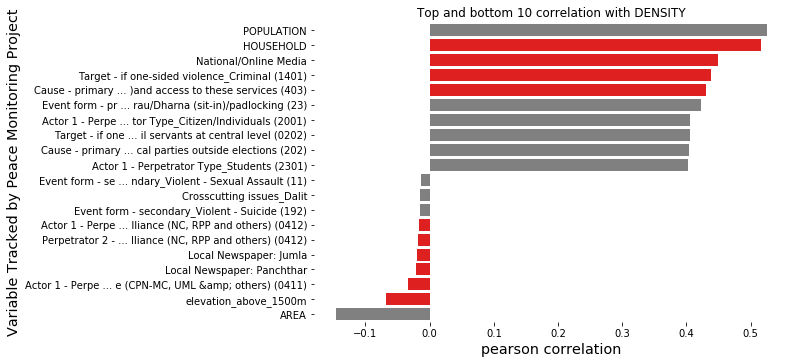

['HOUSEHOLD',
 'National/Online Media',
 'Cause - primary ... )and access to these services (403)',
 'Target - if one-sided violence_Criminal (1401)',
 'Local Newspaper: Jumla',
 'Local Newspaper: Panchthar',
 'Actor 1 - Perpe ... lliance (NC, RPP and others) (0412)',
 'Perpetrator 2 - ... lliance (NC, RPP and others) (0412)',
 'Actor 1 - Perpe ... e (CPN-MC, UML &amp; others) (0411)',
 'elevation_above_1500m']

In [20]:
popcorr = longcorr(pop_incidents_VDC,'POPULATION',['HOUSEHOLD',
 'National/Online Media',
 'Cause - primary ... )and access to these services (403)',
 'Target - if one-sided violence_Criminal (1401)',
 'Local Newspaper: Jumla',
 'Local Newspaper: Panchthar',
 'Actor 1 - Perpe ... lliance (NC, RPP and others) (0412)',
 'Perpetrator 2 - ... lliance (NC, RPP and others) (0412)',
 'Actor 1 - Perpe ... e (CPN-MC, UML &amp; others) (0411)',
 'elevation_above_1500m'])
dencorr = longcorr(pop_incidents_VDC,'DENSITY',['HOUSEHOLD',
 'National/Online Media',
 'Cause - primary ... )and access to these services (403)',
 'Target - if one-sided violence_Criminal (1401)',
 'Local Newspaper: Jumla',
 'Local Newspaper: Panchthar',
 'Actor 1 - Perpe ... lliance (NC, RPP and others) (0412)',
 'Perpetrator 2 - ... lliance (NC, RPP and others) (0412)',
 'Actor 1 - Perpe ... e (CPN-MC, UML &amp; others) (0411)',
 'elevation_above_1500m'])
plt.legend()
plt.show()
[x for x in popcorr.index if x in dencorr.index]

Correlation by Source (individual incidents):


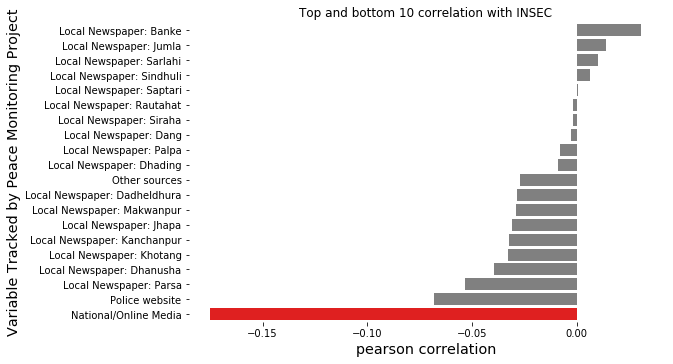

Correlation of sources with other tracked variables by VDC


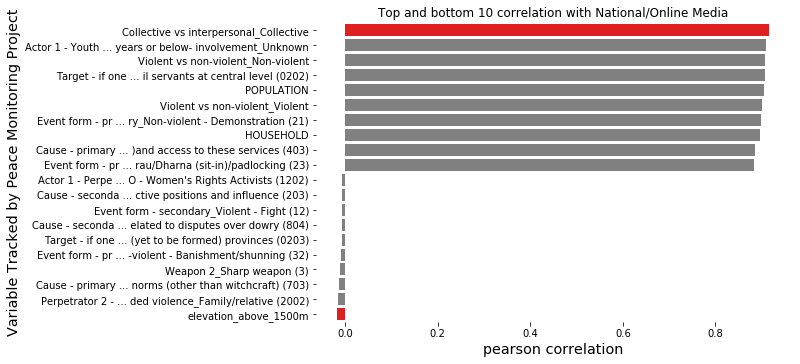

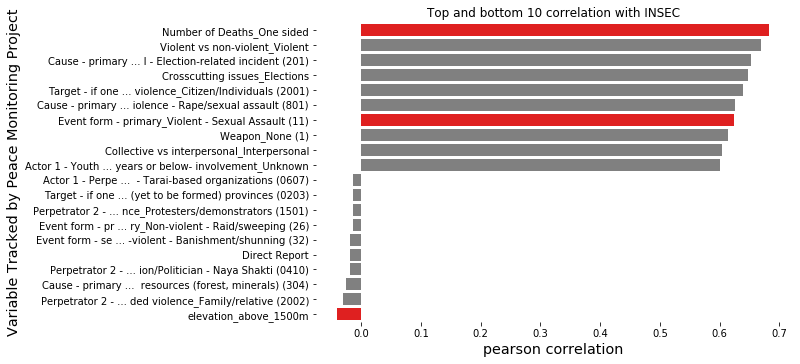

In [21]:
print('Correlation by Source (individual incidents):')
longcorr(source_dum,'INSEC',['National/Online Media'])
plt.show()
print('Correlation of sources with other tracked variables by VDC')
longcorr(pop_incidents_VDC,'National/Online Media',['Collective vs interpersonal_Collective','elevation_above_1500m'])
INSECcoor = longcorr(pop_incidents_VDC,'INSEC',['Event form - primary_Violent - Sexual Assault (11)','Number of Deaths_One sided','elevation_above_1500m'])

plt.show()
#INSECcoor.index

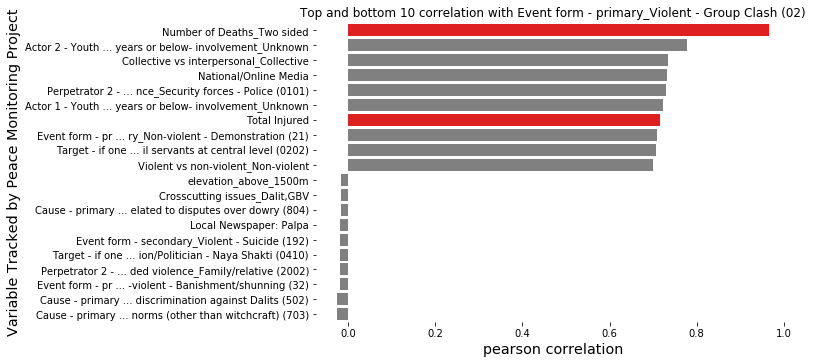

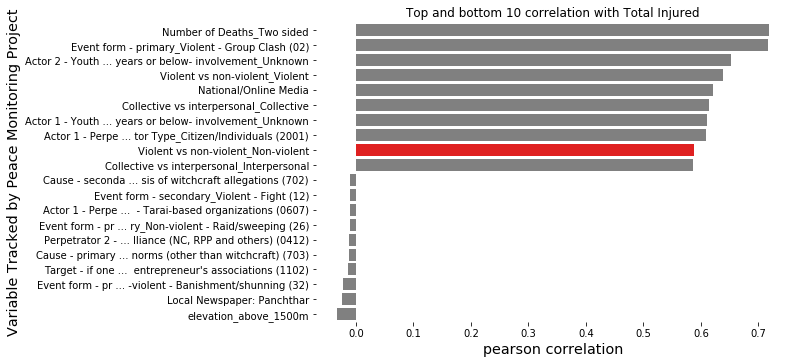

In [23]:
#noincorr = longcorr('Number of Injuries',['Event form - primary_Violent - Group Clash (02)'])
clashcorr = longcorr(pop_incidents_VDC,'Event form - primary_Violent - Group Clash (02)',['Number of Injuries','Total Injured','Number of Deaths_Two sided'])
injured = longcorr(pop_incidents_VDC,'Total Injured',['Violent vs non-violent_Non-violent'])
plt.show()

In [27]:
from scipy import stats

#Run quick bootstrap hypothosis test for significance of difference between data divided? Elevation and INSEC v Online. 
INSEC_VDC = pop_incidents_VDC.loc[pop_incidents_VDC['INSEC'] > 1]
National_VDC = pop_incidents_VDC.loc[pop_incidents_VDC['National/Online Media'] > 1]

var='elevation_above_1500m'

delta = INSEC_VDC[var].mean() - National_VDC[var].mean()
T, P = stats.ttest_ind(INSEC_VDC[var],National_VDC[var],equal_var=False)


print('Difference of means',delta,'\nT statistic:',T,'\nP value:', P)


Difference of means -0.2515802781289507 
T statistic: -0.984206468456 
P value: 0.326021677067


In [28]:
#Try normality test + total killed
from scipy import stats

#boot strap confidence interval for mean
#create bootstrap function

def bsVDC_all(df,var):
        VDCs = np.random.choice(df.index, size=len(df.index))
        lst = pop_incidents_VDC.loc[VDCs][['POPULATION',var]].sum()
        return lst
    

#call bootstrap function for mean
def bsVDC_var(df,var):
    bs_VDCs = pd.DataFrame()
    for i in range(1000):
        lst = bsVDC_all(df,var)
        bs_VDCs[i] = lst
        #print(i)
    bs_VDCs = bs_VDCs.transpose()
    #bs_VDCs.drop(['V.D.C./MUNICIPALITY','DISTRICT'], axis=1,inplace=True)
    return bs_VDCs

In [29]:
pop_incidents_VDC.shape

(3973, 375)

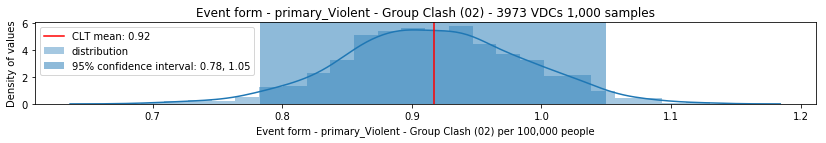

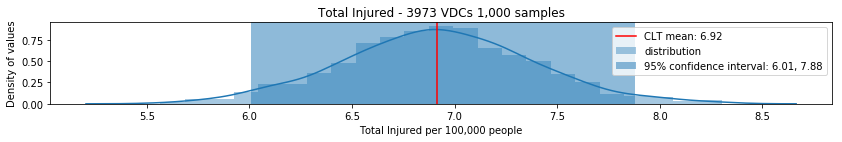

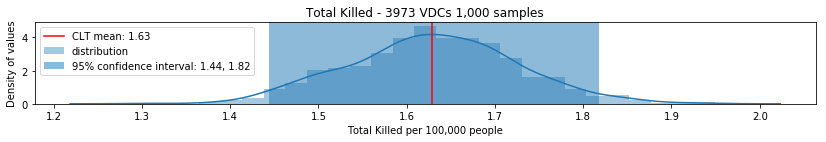

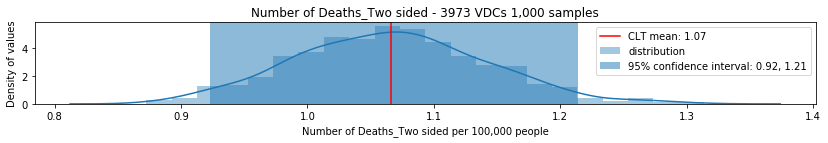

In [30]:
def plot95(df,var):
    bs_total = df[var]/df['POPULATION'] * 100000
    bs_total.dropna(inplace=True)
    cltmean = np.mean(bs_total)
    #find 95% confidence interval for mean
    conf95 = np.percentile(bs_total, [2.5,97.5])
    #make a string out of it
    constr = str(round(conf95[0],2))+', '+str(round(conf95[1],2))

    f, ax = plt.subplots(figsize=(14,1.5))
    sns.distplot(bs_total.tolist(), label='distribution', ax=ax)
    ax.axvspan(conf95[0],conf95[1], alpha=.5, label='95% confidence interval: '+constr)
    ax.axvline(cltmean, color='r',label='CLT mean: '+str(round(cltmean,2)))
    plt.title(var+' - 3973 VDCs 1,000 samples')
    plt.xlabel(var+' per 100,000 people')
    plt.ylabel('Density of values')
    plt.legend()
    plt.show()

#print('r = pearson correlation with population')
for var in ['Event form - primary_Violent - Group Clash (02)','Total Injured','Total Killed','Number of Deaths_Two sided']:
    plot95(bsVDC_var(pop_incidents_VDC,var),var)